# Ćwiczenie 3

Celem ćwiczenia jest imlementacja metody [Minimax z obcinaniem alpha-beta](https://en.wikipedia.org/wiki/Alpha%E2%80%93beta_pruning) do gry Connect Four (czwórki).

W trakcie ćwiczenia można skorzystać z reposytorium z implementacją gry [Connect Four udostępnionym przez Jakuba Łyskawę](https://github.com/lychanl/two-player-games). Ewentualnie, można zaimplementować samemu grę Connect Four (ale, tak aby rozwiązanie miało ten sam interfejs co podany poniżej).

Implementację Minimax należy przetestować używając różną głębokość przeszukiwania. Implementacja Solvera musi zapewniać interfejs jak poniżej, ale można dodać dowolne metody prywatne oraz klasy wspomagające (jeżeli będą potrzebne).

Punktacja:
- Działająca metoda Minimax - **2 pkt**
- Działająca metoda Minimax z obcinaniem alpha-beta - **1.5 pkt**
- Analiza jakości solvera w zależności od głębokości przeszukiwania **1.5pkt**
    - należy zaimplementować w tym celu prostą wizualizację rozgrywki dwóch agentów, bądź kilka przykładów 'z ręki'
- Jakość kodu **2pkt**

Aby importowanie elementów z poniższej komórki działało należy umieścić tego notebooka w tym samym folderze co paczkę `two_player_games`:
```
├── LICENSE
├── README.md
├── minimax.ipynb # <<< HERE
├── test
│   ├── __init__.py
│   ├── test_connect_four.py
│   ├── test_dots_and_boxes.py
│   └── test_pick.py
└── two_player_games
    ├── __init__.py
    ├── games
    │   ├── connect_four.py
    │   └── dots_and_boxes.py
    ├── move.py
    ├── player.py
    └── state.py
```

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd 'drive/MyDrive/Colab Notebooks/Zadanie3'

/content/drive/MyDrive/Colab Notebooks/Zadanie3


In [13]:
from typing import Tuple, List
from two_player_games.player import Player
from two_player_games.games.connect_four import ConnectFour, ConnectFourMove
from copy import copy
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import time
import random

Wielkość planszy

In [5]:
ROW_COUNT = 6
COLUMN_COUNT = 7

In [6]:
class MinMaxSolver:

    def __init__(self, game: ConnectFour):
        self.game = game

    def get_best_move(self, depth: int, alpha_beta: bool, no_alpha_random: bool) -> int:
        if alpha_beta:
            return self.minimax(depth, float('-inf'), float('inf'),
                                self.game.get_current_player().is_first, self.game)[0]
        elif no_alpha_random:
          return self.minimax_no_alpha_beta_random(depth, self.game.get_current_player().is_first, self.game)[0]

        else:
            return self.minimax_no_alpha_beta(depth, self.game.get_current_player().is_first, self.game)[0]

    def is_valid_move(self, col_index: int, current_game: ConnectFour) -> bool:
        return (not current_game.is_finished()) and any(
            move.__eq__(ConnectFourMove(col_index)) for move in current_game.get_moves())

    def minimax_no_alpha_beta(self, depth, is_maximizing_player, simulated_game: ConnectFour) -> Tuple[int, float]:
        if depth == 0 or simulated_game.is_finished():
            return -1, simulated_game.evaluate_payoff_function()

        if is_maximizing_player:
            max_eval = float('-inf')
            best_move = -1
            for column in range(COLUMN_COUNT):
                if self.is_valid_move(column, simulated_game):
                    new_simulated_game = copy(simulated_game)
                    new_simulated_game.make_move(ConnectFourMove(column))
                    eval = self.minimax_no_alpha_beta(depth - 1, not is_maximizing_player, new_simulated_game)[1]
                    if eval > max_eval:
                        max_eval = eval
                        best_move = column
            return best_move, max_eval
        else:
            min_eval = float('inf')
            best_move = -1
            for column in range(COLUMN_COUNT):
                if self.is_valid_move(column, simulated_game):
                    new_simulated_game = copy(simulated_game)
                    new_simulated_game.make_move(ConnectFourMove(column))
                    eval = self.minimax_no_alpha_beta(depth - 1, not is_maximizing_player, new_simulated_game)[1]
                    if eval < min_eval:
                        min_eval = eval
                        best_move = column
            return best_move, min_eval

    def minimax_no_alpha_beta_random(self, depth, is_maximizing_player, simulated_game: ConnectFour) -> Tuple[int, float]:
        if depth == 0 or simulated_game.is_finished():
            return -1, simulated_game.evaluate_payoff_function()

        if is_maximizing_player:
            max_eval = float('-inf')
            best_move = []
            for column in range(COLUMN_COUNT):
                if self.is_valid_move(column, simulated_game):
                    new_simulated_game = copy(simulated_game)
                    new_simulated_game.make_move(ConnectFourMove(column))
                    eval = self.minimax_no_alpha_beta(depth - 1, not is_maximizing_player, new_simulated_game)[1]
                    if eval >= max_eval:
                        max_eval = eval
                        best_move.append(column)
            return random.choice(best_move) , max_eval
        else:
            min_eval = float('inf')
            best_move = []
            for column in range(COLUMN_COUNT):
                if self.is_valid_move(column, simulated_game):
                    new_simulated_game = copy(simulated_game)
                    new_simulated_game.make_move(ConnectFourMove(column))
                    eval = self.minimax_no_alpha_beta(depth - 1, not is_maximizing_player, new_simulated_game)[1]
                    if eval <= min_eval:
                        min_eval = eval
                        best_move.append(column)
            return random.choice(best_move), min_eval

    def minimax(self, depth, alpha, beta, is_maximizing_player, simulated_game: ConnectFour) -> Tuple[int, float]:
        if depth == 0 or simulated_game.is_finished():
            return -1, simulated_game.evaluate_payoff_function()

        if is_maximizing_player:
            max_eval = float('-inf')
            best_move = -1
            for column in range(COLUMN_COUNT):
                if self.is_valid_move(column, simulated_game):
                    new_game = copy(simulated_game)
                    new_game.make_move(ConnectFourMove(column))
                    eval = self.minimax(depth - 1, alpha, beta, not is_maximizing_player, new_game)[1]
                    if eval > max_eval:
                        max_eval = eval
                        best_move = column
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        break
            return best_move, max_eval
        else:
            min_eval = float('inf')
            best_move = -1
            for column in range(COLUMN_COUNT):
                if self.is_valid_move(column, simulated_game):
                    new_game = copy(simulated_game)
                    new_game.make_move(ConnectFourMove(column))
                    eval = self.minimax(depth - 1, alpha, beta, not is_maximizing_player, new_game)[1]
                    if eval < min_eval:
                        min_eval = eval
                        best_move = column
                    beta = min(beta, eval)
                    if beta <= alpha:
                        break
            return best_move, min_eval

In [7]:
def game_simulation(depth_player_1, depth_player_2, alpha_beta_1: bool = True, alpha_beta_2: bool = True,
                    print_boards: bool = False) -> int:
    p1 = Player("a", is_first=True)
    p2 = Player("b")
    game = ConnectFour(size=(COLUMN_COUNT, ROW_COUNT), first_player=p1, second_player=p2)
    while not game.is_finished():
        if not game.is_finished():
            game.make_move(
                ConnectFourMove(MinMaxSolver(game).get_best_move(depth_player_1, alpha_beta=alpha_beta_1)))  # AI BOT 1
        if not game.is_finished():
            game.make_move(
                ConnectFourMove(MinMaxSolver(game).get_best_move(depth_player_2, alpha_beta=alpha_beta_2)))  # AI BOT 2

        if print_boards:
            print(game, "\n")

    if game.get_winner() is None:
        if print_boards:
            print("DRAW")
        return 0
    elif game.get_winner().is_first:
        if print_boards:
            print("Player 1 won!")
        return 1
    else:
        if print_boards:
            print("Player 2 won!")
        return -1


def measure_move_times(depth, alpha_beta) -> List[float]:
    p1 = Player("a", is_first=True)
    p2 = Player("b")
    game = ConnectFour(size=(COLUMN_COUNT, ROW_COUNT), first_player=p1, second_player=p2)
    times = []
    while not game.is_finished():
        start_time = time.time()
        game.make_move(
            ConnectFourMove(MinMaxSolver(game).get_best_move(depth, alpha_beta)))
        end_time = time.time()
        times.append(end_time - start_time)
    return times


def print_winners_depending_on_depth(max_depth, player_1_alpha_beta=True, player_2_alpha_beta=True):
    depths = list(range(1, max_depth + 1))
    results = []
    for depth_1 in depths:
        row = []
        for depth_2 in depths:
            winner = game_simulation(depth_1, depth_2, alpha_beta_1=player_1_alpha_beta, alpha_beta_2=player_2_alpha_beta)
            row.append(winner)
        results.append(row)

    table = PrettyTable()
    table.field_names = ["Głębokość Gracz 1"] + [str(depth) for depth in depths]
    for i, row in zip(depths, results):
        table.add_row([f"Głębokość Gracz 2: {i}"] + row)

    print(f"""Wyniki:
    Gracz1: odcięcie alpha-beta = {player_1_alpha_beta}
    Gracz2: odcięcie alpha-beta = {player_2_alpha_beta}
    """)
    print(table)
    print("""Legenda:
      0 -->  remis
      1 -->  zwycięstwo gracza 1
     -1 -->  zwycięstwo gracza 2
     """)


    results_numeric = np.array(results, dtype=int)
    fig, ax = plt.subplots()
    cax = ax.matshow(results_numeric, cmap='coolwarm', vmin=-1, vmax=1)

    plt.xticks(range(len(depths)), depths)
    plt.yticks(range(len(depths)), depths)
    plt.xlabel('Głębokość Gracz 2')
    plt.ylabel('Głębokość Gracz 1')

    plt.colorbar(cax, ticks=[-1, 0, 1], label='Zwycięzca')

    plt.title('Wyniki gry w zależności od głębokości graczy')
    plt.show()



Rozgrywka

In [11]:
game_simulation(4, 4, alpha_beta_1=False, alpha_beta_2=False ,print_boards=True)

Current player: a
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][b][a][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][b][ ][a][ ][ ][ ]
[ ][a][ ][b][ ][ ][ ]
[ ][b][a][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][b][ ][a][ ][ ][ ]
[ ][a][ ][b][ ][ ][ ]
[ ][b][ ][a][ ][ ][ ]
[ ][a][ ][b][ ][ ][ ]
[ ][b][a][a][ ][ ][ ] 

Current player: a
[ ][a][ ][b][ ][ ][ ]
[ ][b][ ][a][ ][ ][ ]
[ ][a][ ][b][ ][ ][ ]
[ ][

0

In [8]:
game_simulation(4, 4, print_boards=True)

Current player: a
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][b][a][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][b][ ][a][ ][ ][ ]
[ ][a][ ][b][ ][ ][ ]
[ ][b][a][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][b][ ][a][ ][ ][ ]
[ ][a][ ][b][ ][ ][ ]
[ ][b][ ][a][ ][ ][ ]
[ ][a][ ][b][ ][ ][ ]
[ ][b][a][a][ ][ ][ ] 

Current player: a
[ ][a][ ][b][ ][ ][ ]
[ ][b][ ][a][ ][ ][ ]
[ ][a][ ][b][ ][ ][ ]
[ ][

0

In [9]:
game_simulation(3, 5, print_boards=True)

Current player: a
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][b][b][ ][ ][ ]
[ ][ ][a][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[ ][ ][b][b][ ][ ][ ]
[ ][ ][a][a][ ][ ][ ]
[ ][ ][b][b][ ][ ][ ]
[ ][ ][a][a][ ][ ][ ] 

Current player: a
[ ][ ][ ][b][ ][ ][ ]
[ ][ ][a][a][ ][ ][ ]
[ ][ ][b][b][ ][ ][ ]
[ ][ ][a][a][ ][ ][ ]
[ ][ ][b][b][ ][ ][ ]
[ ][b][a][a][ ][ ][ ] 

Current player: a
[ ][ ][a][b][ ][ ][ ]
[ ][ ][a][a][ ][ ][ ]
[ ][ ][b][b][ ][ ][ ]
[ ][

-1

Wyniki:
    Gracz1: odcięcie alpha-beta = False
    Gracz2: odcięcie alpha-beta = False
    
+----------------------+---+----+----+----+----+
|  Głębokość Gracz 1   | 1 | 2  | 3  | 4  | 5  |
+----------------------+---+----+----+----+----+
| Głębokość Gracz 2: 1 | 0 | 0  | -1 | -1 | 0  |
| Głębokość Gracz 2: 2 | 1 | 1  | 1  | 1  | -1 |
| Głębokość Gracz 2: 3 | 1 | -1 | 1  | -1 | -1 |
| Głębokość Gracz 2: 4 | 1 | 1  | 1  | 0  | 1  |
| Głębokość Gracz 2: 5 | 1 | 1  | 0  | 1  | 1  |
+----------------------+---+----+----+----+----+
Legenda:
      0 -->  remis
      1 -->  zwycięstwo gracza 1
     -1 -->  zwycięstwo gracza 2
     


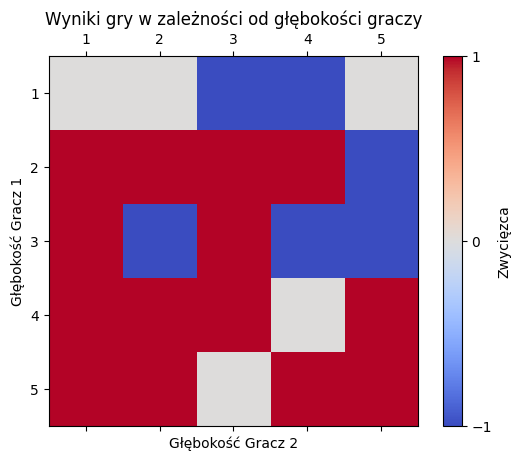

In [12]:
print_winners_depending_on_depth(5, False, False)

Wyniki:
    Gracz1: odcięcie alpha-beta = True
    Gracz2: odcięcie alpha-beta = True
    
+----------------------+---+----+----+----+----+----+
|  Głębokość Gracz 1   | 1 | 2  | 3  | 4  | 5  | 6  |
+----------------------+---+----+----+----+----+----+
| Głębokość Gracz 2: 1 | 0 | 0  | -1 | -1 | 0  | -1 |
| Głębokość Gracz 2: 2 | 1 | 1  | 1  | 1  | -1 | -1 |
| Głębokość Gracz 2: 3 | 1 | -1 | 1  | -1 | -1 | 0  |
| Głębokość Gracz 2: 4 | 1 | 1  | 1  | 0  | 1  | 0  |
| Głębokość Gracz 2: 5 | 1 | 1  | 0  | 1  | 1  | -1 |
| Głębokość Gracz 2: 6 | 1 | 1  | 1  | -1 | 1  | -1 |
+----------------------+---+----+----+----+----+----+
Legenda:
      0 -->  remis
      1 -->  zwycięstwo gracza 1
     -1 -->  zwycięstwo gracza 2
     


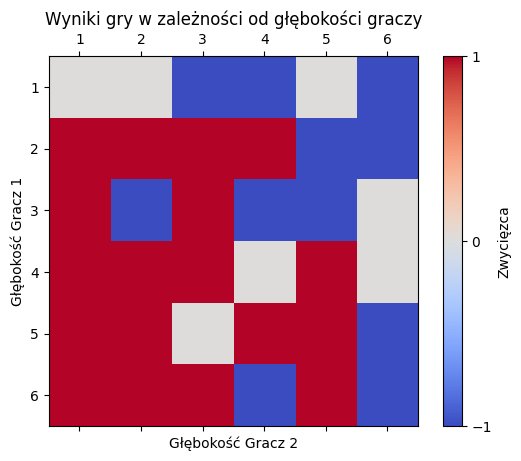

In [10]:
print_winners_depending_on_depth(6)

Wyniki:
    Gracz1: odcięcie alpha-beta = True
    Gracz2: odcięcie alpha-beta = True
    
+----------------------+----+----+----+----+----+----+----+
|  Głębokość Gracz 1   | 1  | 2  | 3  | 4  | 5  | 6  | 7  |
+----------------------+----+----+----+----+----+----+----+
| Głębokość Gracz 2: 1 | 0  | 0  | -1 | -1 | 0  | -1 | 0  |
| Głębokość Gracz 2: 2 | 1  | 1  | 1  | 1  | -1 | -1 | -1 |
| Głębokość Gracz 2: 3 | 1  | -1 | 1  | -1 | -1 | 0  | -1 |
| Głębokość Gracz 2: 4 | 1  | 1  | 1  | 0  | 1  | 0  | 1  |
| Głębokość Gracz 2: 5 | 1  | 1  | 0  | 1  | 1  | -1 | 0  |
| Głębokość Gracz 2: 6 | 1  | 1  | 1  | -1 | 1  | -1 | -1 |
| Głębokość Gracz 2: 7 | -1 | -1 | 1  | -1 | 0  | 1  | 1  |
+----------------------+----+----+----+----+----+----+----+
Legenda:
      0 -->  remis
      1 -->  zwycięstwo gracza 1
     -1 -->  zwycięstwo gracza 2
     


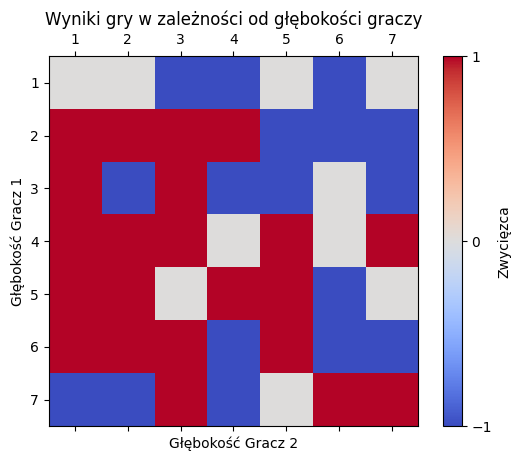

In [ ]:
print_winners_depending_on_depth(7)

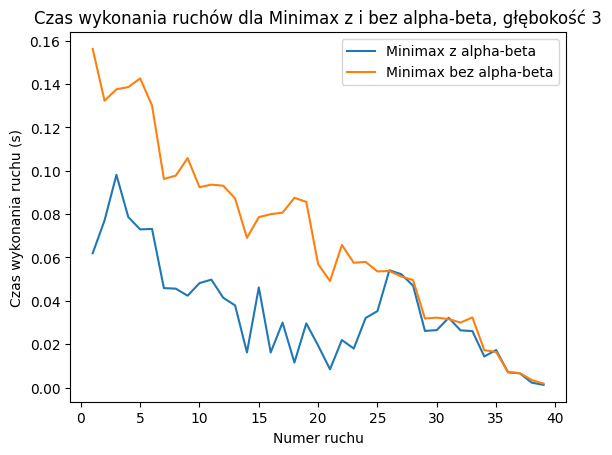

Całkowity czas dla algorutmu bez odcięcia, dla głębokości 3 = 2.696287155151367 
Całkowity czas dla algorutmu z odcięciem, dla głębokości 3 = 1.403078317642212 


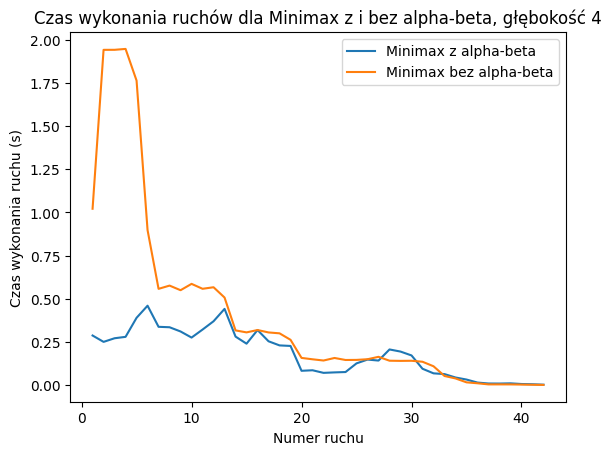

Całkowity czas dla algorutmu bez odcięcia, dla głębokości 4 = 17.24479055404663 
Całkowity czas dla algorutmu z odcięciem, dla głębokości 4 = 7.630340576171875 


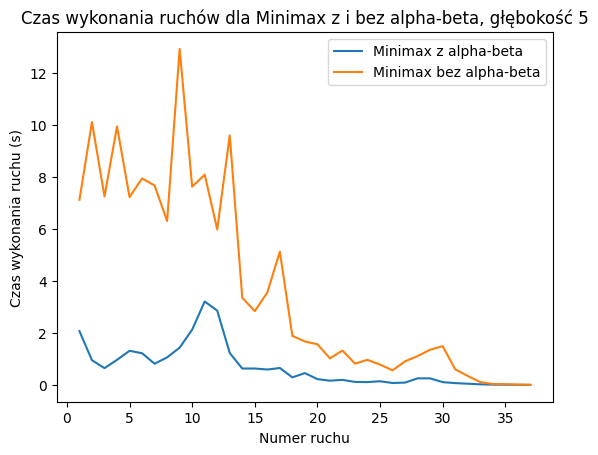

Całkowity czas dla algorutmu bez odcięcia, dla głębokości 5 = 139.35596108436584 
Całkowity czas dla algorutmu z odcięciem, dla głębokości 5 = 25.118626356124878 


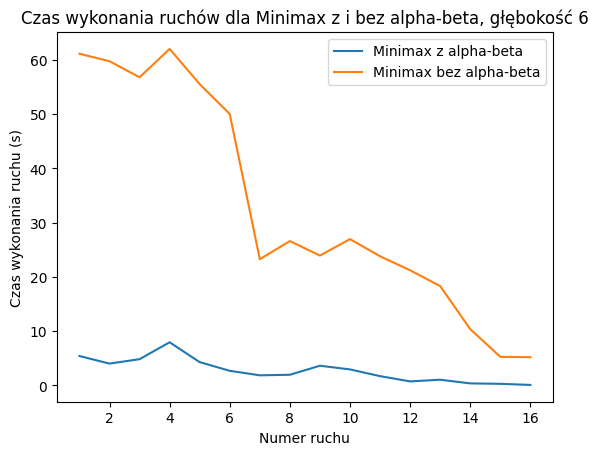

Całkowity czas dla algorutmu bez odcięcia, dla głębokości 6 = 530.3552651405334 
Całkowity czas dla algorutmu z odcięciem, dla głębokości 6 = 43.77661418914795 


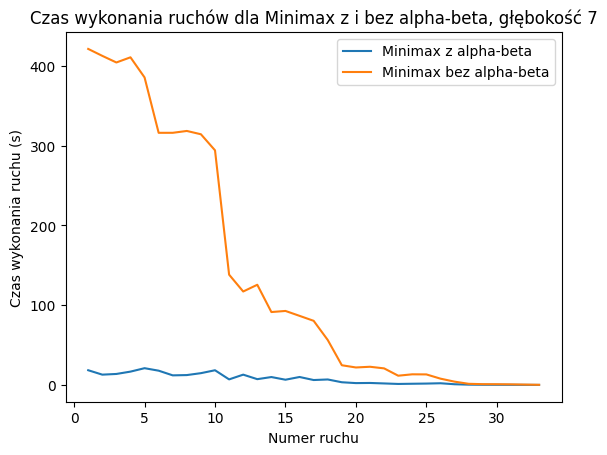

Całkowity czas dla algorutmu bez odcięcia, dla głębokości 7 = 4528.390134811401 
Całkowity czas dla algorutmu z odcięciem, dla głębokości 7 = 243.42582964897156 


In [ ]:
depths = list(range(3, 8))

for depth in depths:
    start_time = time.time()
    times_no_alpha_beta = measure_move_times(depth, alpha_beta=False)
    end_time = time.time()
    no_alpha_tima = end_time - start_time
    start_time = time.time()
    times_alpha_beta = measure_move_times(depth, alpha_beta=True)
    end_time = time.time()
    alpha_tima = end_time - start_time
    moves = list(range(1, len(times_alpha_beta) + 1))

    plt.plot(moves, times_alpha_beta, label='Minimax z alpha-beta')
    plt.plot(moves, times_no_alpha_beta, label='Minimax bez alpha-beta')

    plt.xlabel('Numer ruchu')
    plt.ylabel('Czas wykonania ruchu (s)')
    plt.legend()
    plt.title(f'Czas wykonania ruchów dla Minimax z i bez alpha-beta, głębokość {depth}')
    plt.show()
    print(f'Całkowity czas dla algorutmu bez odcięcia, dla głębokości {depth} = {no_alpha_tima} ')
    print(f'Całkowity czas dla algorutmu z odcięciem, dla głębokości {depth} = {alpha_tima} ')

## Wnioski:
Jak widzimy oba algorytmy działają poprawnie, ale algorytm z odcięciem alpha-beta działa znacznie szybiej. Z jak widzimy algorytmy o większej głębokości wygrywają z tymi z mniejszą głębokością